In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from src.utils.utils import DATA_PATH, ROOT
from src.dataset import SVHNDataset
from ultralytics import YOLO
from src.onnx_model import YoloOnnxModel
import numpy as np
import cv2

In [3]:
model = YOLO("yolov8n.pt")
# model = YOLO(ROOT / "notebooks/runs/detect/train/weights/best.pt")
model.train(data="../svhn.yaml", epochs=100, imgsz=640, device=0, batch=32)

Ultralytics YOLOv8.0.114 🚀 Python-3.11.3 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7974MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=../svhn.yaml, epochs=100, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False

AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /home/shate/Desktop/projects/yolov8-digits-detection/datasets/SVHN/labels/train.cache... 33402 images, 0 backgrounds, 1 corrupt: 100%|██████████| 33402/33402 [00:00<?, ?it/s]
train: WARNING ⚠️ /home/shate/Desktop/projects/yolov8-digits-detection/datasets/SVHN/images/train/12668.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3077]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /home/shate/Desktop/projects/yolov8-digits-detection/datasets/SVHN/labels/test.cache... 13068 images, 0 backgrounds, 1 corrupt: 100%|██████████| 13068/13068 [00:00<?, ?it/s]
val: WARNING ⚠️ /home/shate/Desktop/projects/yolov8-digits-detection/datasets/SVHN/images/test/3192.png: ignoring corrupt image/label: non-normalized or out of bounds coordi

KeyboardInterrupt: 

In [4]:
root = str(DATA_PATH / "SVHN")
ds = SVHNDataset(root=root, split="test", download=False)

2023-06-07 18:34:42 - INFO - Creating test SVHN dataset parsed to YOLO format.
2023-06-07 18:34:42 - INFO - 13068 SVHN test images are already parsed to 13068 yolo labels
2023-06-07 18:34:42 - INFO - SVHN test dataset is already parsed to YOLO format. Stopping.


In [3]:
model = YOLO(ROOT / "notebooks/runs/detect/train7/weights/best.pt")
model.export(format="onnx", imgsz=640)

model_path = ROOT / "notebooks/runs/detect/train7/weights/best.onnx"
onnx_model = YoloOnnxModel(model_path, 0.25, 0.7)

Ultralytics YOLOv8.0.114 🚀 Python-3.11.3 torch-2.0.1+cu117 CPU
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients

PyTorch: starting from /home/shate/Desktop/projects/yolov8-digits-detection/notebooks/runs/detect/train7/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (23.4 MB)

ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: export success ✅ 0.5s, saved as /home/shate/Desktop/projects/yolov8-digits-detection/notebooks/runs/detect/train7/weights/best.onnx (11.7 MB)

Export complete (0.8s)
Results saved to /home/shate/Desktop/projects/yolov8-digits-detection/notebooks/runs/detect/train7/weights
Predict:         yolo predict task=detect model=/home/shate/Desktop/projects/yolov8-digits-detection/notebooks/runs/detect/train7/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=/home/shate/Desktop/projects/yolov8-digits-detection/notebooks/runs/detect/train7/weights/best.onnx imgsz=640 data=../svhn.yaml 
Vi

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



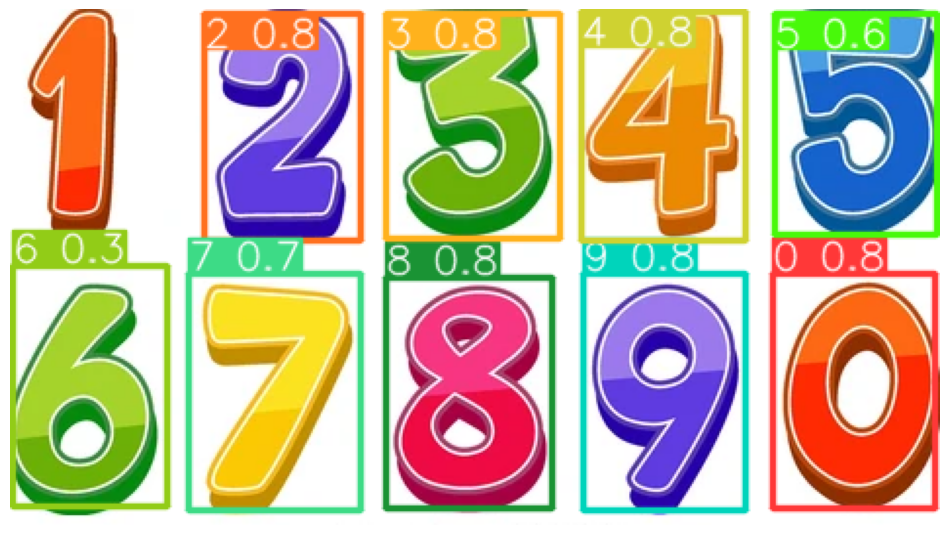

In [23]:
img = np.array(ds[111][0])
img = cv2.imread("../datasets/SVHN/examples/7.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

x = np.asarray(img)[..., :3].astype(np.uint8)
out = onnx_model(x)

_ = out.visualize()

In [21]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    cv2.imshow("frame", abs(frame - 100))

    if cv2.waitKey(1) == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()